In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('../input/creditcard/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

0    284315
1       492
Name: Class, dtype: int64
No frauds:  99.83 %
Frauds:  0.17 %


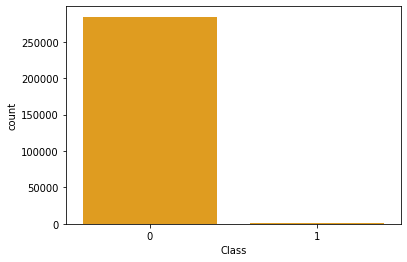

In [5]:
df["Class"].value_counts()
import seaborn as sns
sns.countplot(df["Class"], color='orange')
print(df["Class"].value_counts())

print("No frauds: ",round(df["Class"].value_counts()[0]/len(df)*100,2), "%")
print("Frauds: ",round(df["Class"].value_counts()[1]/len(df)*100,2), "%")

<AxesSubplot:xlabel='Amount', ylabel='Density'>

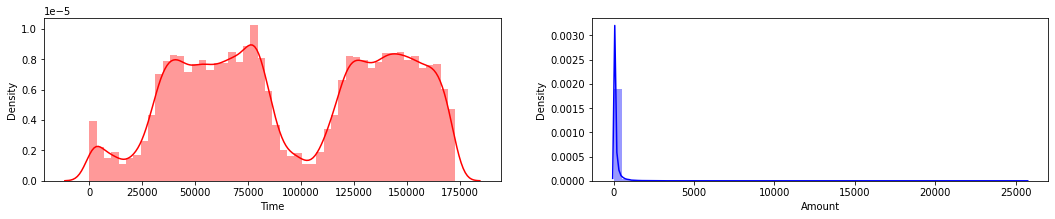

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18,3))
import seaborn as sns
sns.distplot(df['Time'], ax=ax[0], color='r')
sns.distplot(df["Amount"], ax=ax[1], color='b')


<AxesSubplot:>

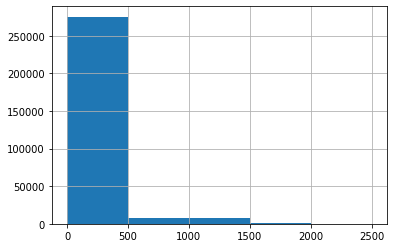

In [7]:
df["Amount"].hist(bins=[0,500,1500,2000,2500])

In [8]:
#all the columns are already scaled except amount and time columns
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()


df['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)


In [9]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [10]:
# #Now we use stratifiedKfold for splitting train and test set
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold

# X=df.drop('Class', axis=1)
# y = df['Class']

# skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
# for train_index, test_index in skf.split(X, y):
#     print("Train:", train_index, "Test:", test_index)
#     original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
#     original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
# # Turn into an array
# original_Xtrain = original_Xtrain.values
# original_Xtest = original_Xtest.values
# original_ytrain = original_ytrain.values
# original_ytest = original_ytest.values

# # See if both the train and test label distribution are similarly distributed
# train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
# test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
# print('-' * 100)

# print('Label Distributions: \n')
# print(train_counts_label/ len(original_ytrain))
# print(test_counts_label/ len(original_ytest))



In [11]:
#randon undersampling

df = df.sample(frac=1)

fraud_df = df.loc[df['Class']==1]
no_fraud_df = df.loc[df['Class']==0][:492]

normal_distributed_df = pd.concat([fraud_df,no_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()
print(new_df.shape)
print(df.shape)

(984, 31)
(284807, 31)


In [12]:
# Now we have equal number of 1's and 0's ,i.e we have balanced data !
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

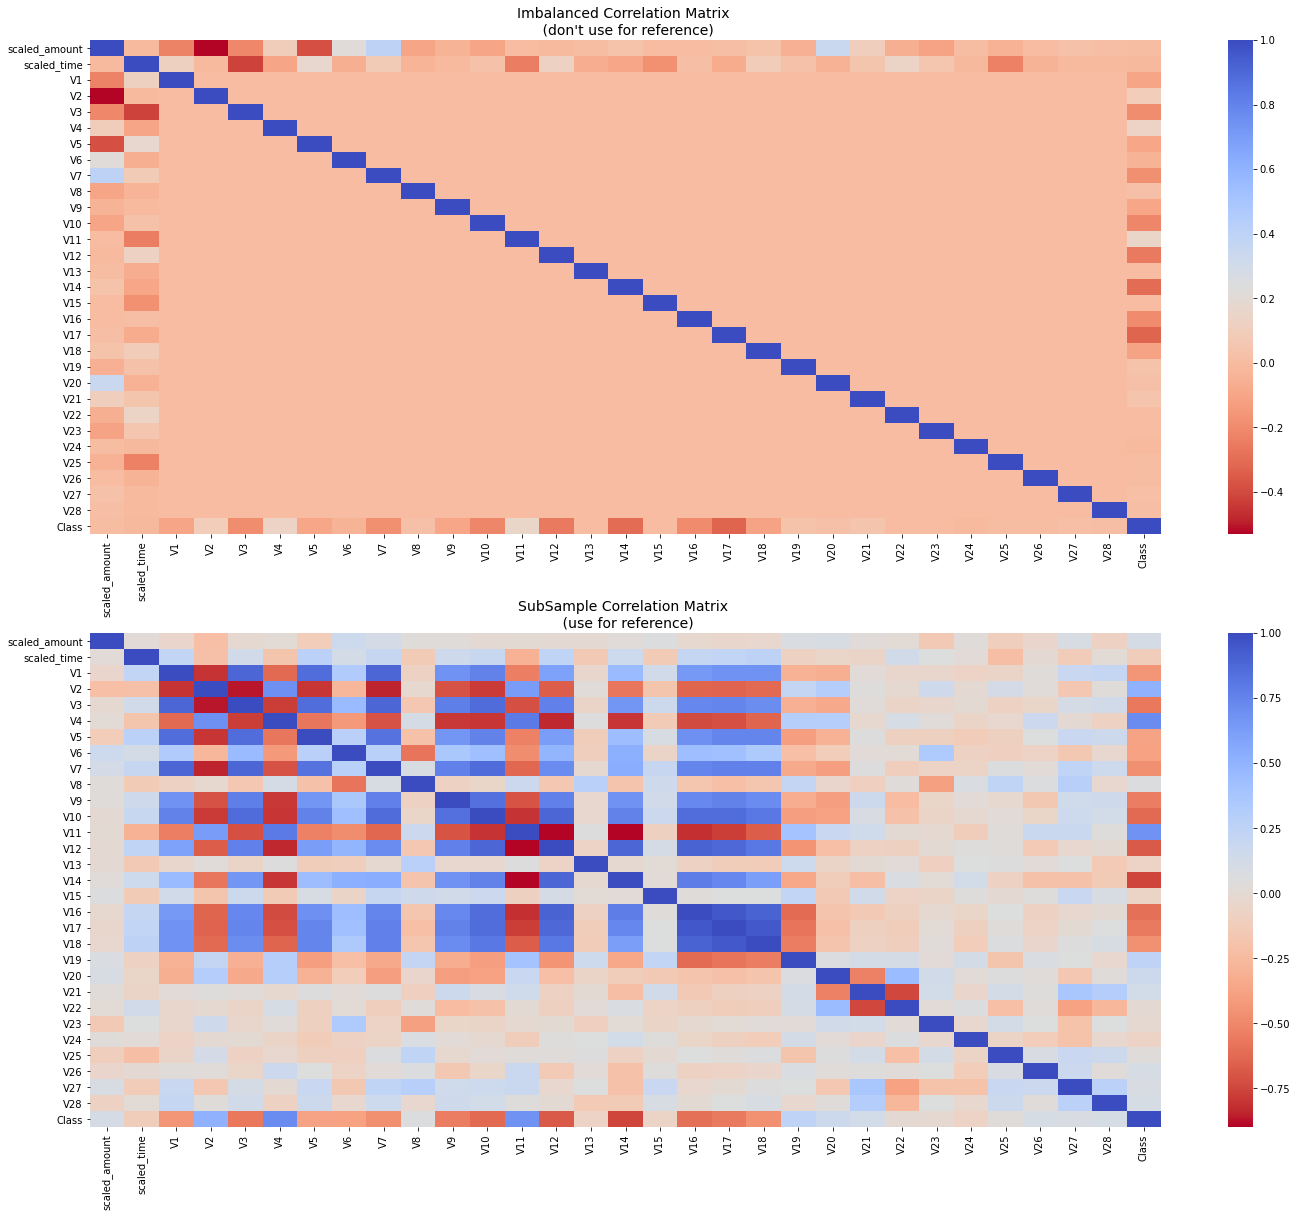

In [13]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

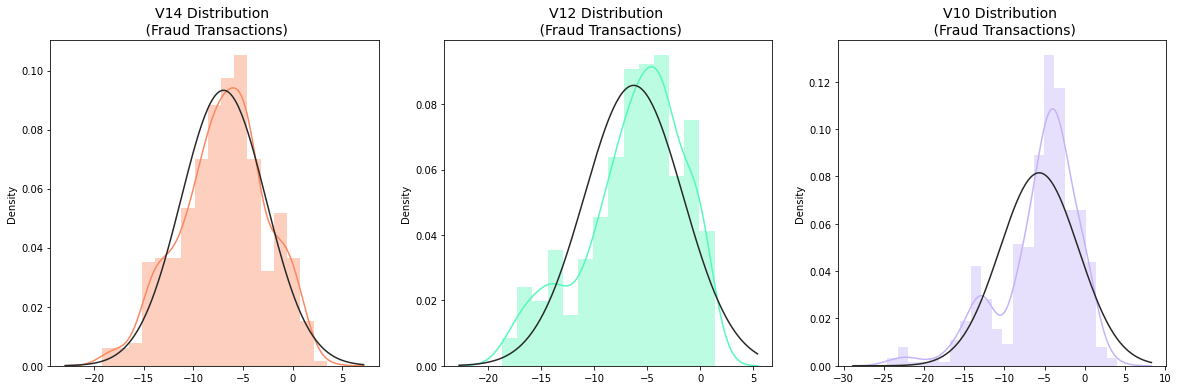

In [14]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

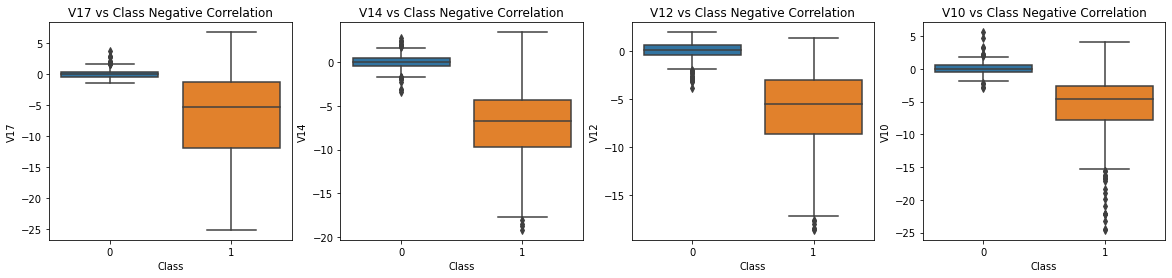

In [15]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

In [16]:
import numpy as np
v14_fraud = new_df['V14'].loc[new_df['Class']==1].values
q25=np.percentile(v14_fraud,25)
q75=np.percentile(v14_fraud,75)
v14_iqr = q75 - q25

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off

outliers = [x for x in v14_fraud if x<v14_lower or x>v14_upper]
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('\n')

v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)

# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)



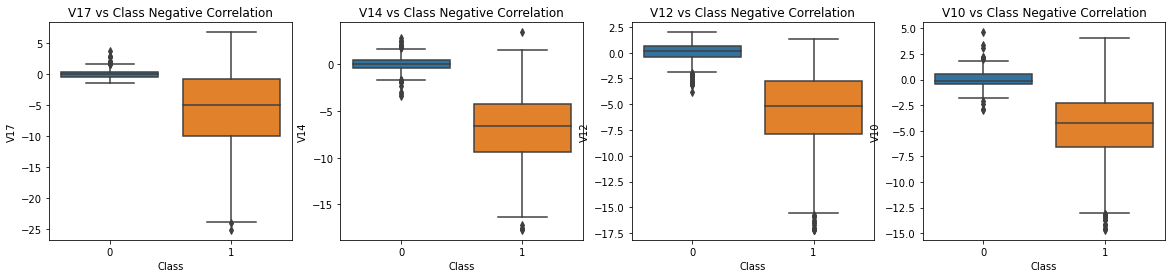

In [17]:
#Graphs after removing outliners for v14 v10 and v12
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

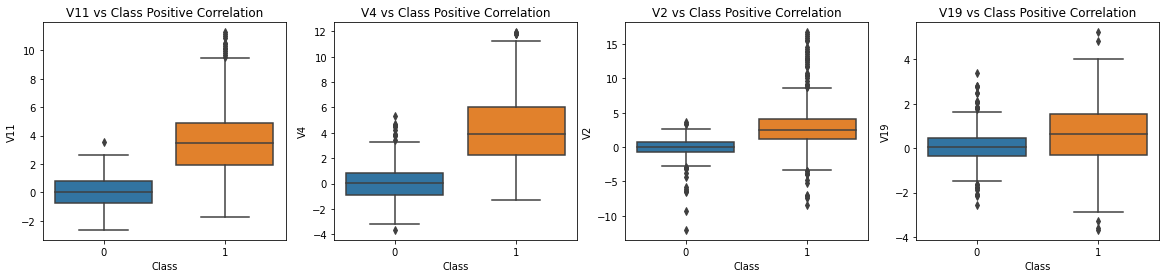

In [18]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

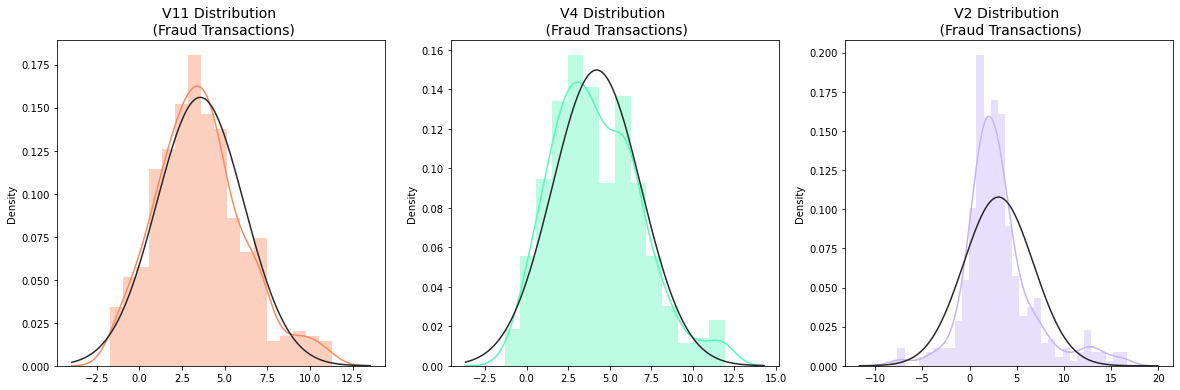

In [19]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v11_fraud_dist = new_df['V11'].loc[new_df['Class'] == 1].values
sns.distplot(v11_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V11 Distribution \n (Fraud Transactions)', fontsize=14)

v4_fraud_dist = new_df['V4'].loc[new_df['Class'] == 1].values
sns.distplot(v4_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V4 Distribution \n (Fraud Transactions)', fontsize=14)


v2_fraud_dist = new_df['V2'].loc[new_df['Class'] == 1].values
sns.distplot(v2_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V2 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [20]:
import numpy as np
v11_fraud = new_df['V11'].loc[new_df['Class']==1].values
q25=np.percentile(v11_fraud,25)
q75=np.percentile(v11_fraud,75)
v11_iqr = q75 - q25

v11_cut_off = v11_iqr * 1.5
v11_lower, v11_upper = q25 - v11_cut_off, q75 + v11_cut_off

outliers = [x for x in v11_fraud if x<v11_lower or x>v11_upper]
new_df = new_df.drop(new_df[(new_df['V11'] > v11_upper) | (new_df['V11'] < v11_lower)].index)
print('\n')

v2_fraud = new_df['V2'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v2_fraud, 25), np.percentile(v2_fraud, 75)
v2_iqr = q75 - q25
v2_cut_off = v2_iqr * 1.5
v2_lower, v2_upper = q25 - v2_cut_off, q75 + v2_cut_off
outliers = [x for x in v2_fraud if x < v2_lower or x > v2_upper]
new_df = new_df.drop(new_df[(new_df['V2'] > v2_upper) | (new_df['V2'] < v2_lower)].index)

# Removing outliers V10 Feature
v19_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v19_fraud, 25), np.percentile(v19_fraud, 75)
v19_iqr = q75 - q25

v19_cut_off = v19_iqr * 1.5
v19_lower, v19_upper = q25 - v19_cut_off, q75 + v19_cut_off
outliers = [x for x in v19_fraud if x < v19_lower or x > v19_upper]
new_df = new_df.drop(new_df[(new_df['V19'] > v19_upper) | (new_df['V19'] < v19_lower)].index)



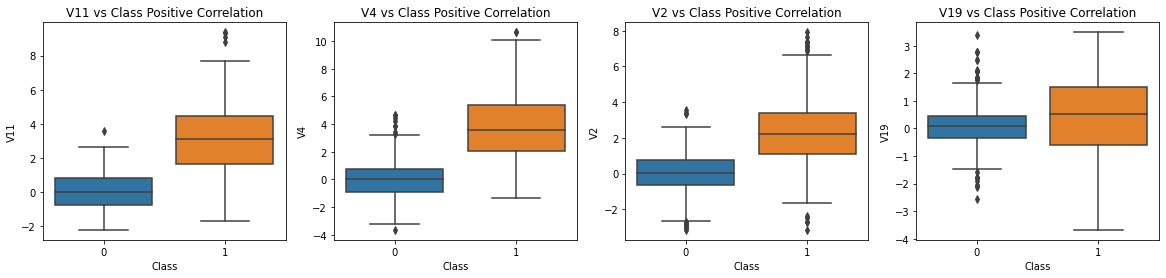

In [21]:
#grphs of v11 v4 and v2 after removing outliners
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [22]:
new_df.columns

Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')

In [23]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [24]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X=scaler.fit_transform(X)


In [25]:
# features=X.T
# covariance_matrix = np.cov(features)


In [26]:
# eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [27]:
# lst=[]
# for i in range(len(eig_vals)):
#     s = eig_vals[i]/sum(eig_vals)
#     lst.append(s)

# lst

In [28]:
# # Create a list of (eigenvalue, eigenvector) tuples
# eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# # Sort from high to low
# eig_pairs.sort(key = lambda x: x[0], reverse= True)

# # Calculation of Explained Variance from the eigenvalues
# tot = sum(eig_vals)
# var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
# cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [29]:
# plt.figure(figsize=(10, 5))
# plt.bar(range(40), range(40), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
# plt.step(range(40), range(40), cum_var_exp, where='mid',label='cumulative explained variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal components')
# plt.legend(loc='best')
# plt.show()

In [30]:
def train_set(ytrain,train_pred):
    print("confusion matrix for train set : ")
    cm = confusion_matrix(ytrain,train_pred)
    print(cm)
    print("--"*40)
    print("False positive rate :",(cm[1][0]/(cm[1][0]+cm[1][1]))*100)  # FPR = FP/FP +TN
    print("\n")
    print(cm[1][0] ,"out of",(cm[1][0]+cm[1][1]),"fraud transaction instances were classified as not a fraudulent transactions \n")
    print("--"*40)
    print("False Negative rate :",(cm[0][1]/(cm[0][1]+cm[0][0]))*100) # FNR = FN + (FN + TP )
    print("\n")
    print(cm[0][1],"out of ",(cm[0][1]+cm[0][0]),"non fraudulent transaction instances were classified as  a fraudulent transactions")
    print("--"*40)
    print(classification_report(ytrain,train_pred))

In [31]:
def test_set(ytest,test_pred):
    print("confusion matrix for test set : ")
    cm = confusion_matrix(ytest,test_pred)
    print(cm)
    print("--"*40)
    print("False positive rate :",(cm[1][0]/(cm[1][0]+cm[1][1]))*100)  # FPR = FP/FP +TN
    print("\n")
    print(cm[1][0] ,"out of",(cm[1][0]+cm[1][1]),"fraud transaction instances were classified as not a fraudulent transactions \n")
    print("--"*40)
    print("False Negative rate :",(cm[0][1]/(cm[0][1]+cm[0][0]))*100) # FNR = FN + (FN + TP )
    print("\n")
    print(cm[0][1],"out of ",(cm[0][1]+cm[0][0]),"non fraudulent transaction instances were classified as  a fraudulent transactions")
    print("--"*40)
    print(classification_report(ytest,test_pred))

Accuracy for Training set :  0.9555125725338491
Accuracy for Testing set  :  0.9420289855072463


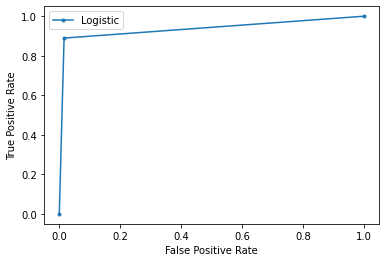

In [32]:
from matplotlib import pyplot
lr_model = LogisticRegression()
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.4,random_state = 1)
lr_model.fit(xtrain,ytrain)
train_pred=lr_model.predict(xtrain)
test_pred=lr_model.predict(xtest)
print("Accuracy for Training set : ",accuracy_score(ytrain,train_pred))
print("Accuracy for Testing set  : ",accuracy_score(ytest,test_pred))
roc_auc_logistic = roc_auc_score(ytest,test_pred)
roc_auc_logistic
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,test_pred)
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
train_set(ytrain,train_pred)

confusion matrix for train set : 
[[287   3]
 [ 20 207]]
--------------------------------------------------------------------------------
False positive rate : 8.81057268722467


20 out of 227 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 1.0344827586206897


3 out of  290 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       290
           1       0.99      0.91      0.95       227

    accuracy                           0.96       517
   macro avg       0.96      0.95      0.95       517
weighted avg       0.96      0.96      0.96       517



In [34]:
test_set(ytest,test_pred)

confusion matrix for test set : 
[[188   3]
 [ 17 137]]
--------------------------------------------------------------------------------
False positive rate : 11.03896103896104


17 out of 154 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 1.5706806282722512


3 out of  191 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       191
           1       0.98      0.89      0.93       154

    accuracy                           0.94       345
   macro avg       0.95      0.94      0.94       345
weighted avg       0.94      0.94      0.94       345



In [41]:
param_grid = { 
    'n_estimators': [10,20,30,40,50],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [6,7,8,10,12],
    'criterion' :['gini', 'entropy']
}

In [43]:
rfc = RandomForestClassifier(random_state=0)

In [44]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X,y)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

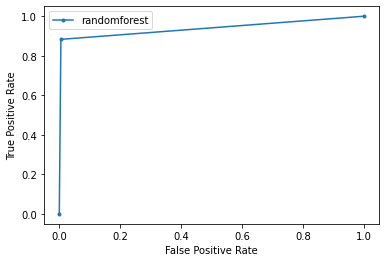

Accuracy for Training set :  0.9671179883945842
Accuracy for Testing set  :  0.9449275362318841


In [45]:
rf_model = RandomForestClassifier(n_estimators=200,max_depth = 8,min_samples_split = 20)
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.4,random_state = 1)
rf_model.fit(xtrain,ytrain)
#train_set
train_pred = rf_model.predict(xtrain)
#test_set
test_pred  = rf_model.predict(xtest)
roc_auc_random = roc_auc_score(ytest,test_pred)
roc_auc_random
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,test_pred)
pyplot.plot(fpr, tpr, marker='.', label='randomforest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print("Accuracy for Training set : ",accuracy_score(ytrain,train_pred))
print("Accuracy for Testing set  : ",accuracy_score(ytest,test_pred)) 

In [46]:
train_set(ytrain,train_pred)

confusion matrix for train set : 
[[288   2]
 [ 15 212]]
--------------------------------------------------------------------------------
False positive rate : 6.607929515418502


15 out of 227 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 0.6896551724137931


2 out of  290 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       290
           1       0.99      0.93      0.96       227

    accuracy                           0.97       517
   macro avg       0.97      0.96      0.97       517
weighted avg       0.97      0.97      0.97       517



In [37]:
test_set(ytest,test_pred)

confusion matrix for test set : 
[[189   2]
 [ 17 137]]
--------------------------------------------------------------------------------
False positive rate : 11.03896103896104


17 out of 154 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 1.0471204188481675


2 out of  191 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       191
           1       0.99      0.89      0.94       154

    accuracy                           0.94       345
   macro avg       0.95      0.94      0.94       345
weighted avg       0.95      0.94      0.94       345



In [38]:
print("ROC_AUC_SCORE FOR LOGISTIC REG IS  : ",roc_auc_logistic)
print("ROC_AUC_SCORE FOR Random Forest IS : ",roc_auc_random)

ROC_AUC_SCORE FOR LOGISTIC REG IS  :  0.9369517916638336
ROC_AUC_SCORE FOR Random Forest IS :  0.939569592710954


In [39]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 1)
# over_sam_x,over_sam_y = sm.fit_sample(x,y)
# print("Feature size   after oversampling :",over_sam_x.shape)
# print("Dependent size after oversampling :",over_sam_y.shape)
# sns.countplot(over_sam_y)

In [53]:
param_grid = { 
    'n_neighbors' : [5,10,15,20]
}

In [54]:
from sklearn.neighbors import KNeighborsClassifier
rkc=KNeighborsClassifier()

In [55]:

CV_rkc = GridSearchCV(estimator=rkc, param_grid=param_grid, cv= 5)
CV_rkc.fit(X,y)
CV_rkc.best_params_



{'n_neighbors': 5}

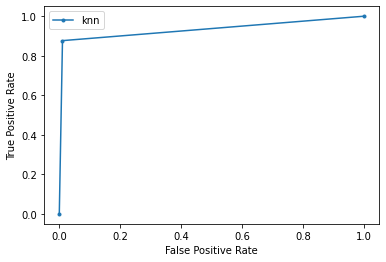

Accuracy for Training set :  0.9381044487427466
Accuracy for Testing set  :  0.9391304347826087


In [57]:
rf_model=KNeighborsClassifier()
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.4,random_state = 1)
rf_model.fit(xtrain,ytrain)
#train_set
train_pred = rf_model.predict(xtrain)
#test_set
test_pred  = rf_model.predict(xtest)
roc_auc_random = roc_auc_score(ytest,test_pred)
roc_auc_random
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,test_pred)
pyplot.plot(fpr, tpr, marker='.', label='knn')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print("Accuracy for Training set : ",accuracy_score(ytrain,train_pred))
print("Accuracy for Testing set  : ",accuracy_score(ytest,test_pred)) 

In [58]:
train_set(ytrain,train_pred)

confusion matrix for train set : 
[[286   4]
 [ 28 199]]
--------------------------------------------------------------------------------
False positive rate : 12.334801762114537


28 out of 227 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 1.3793103448275863


4 out of  290 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       290
           1       0.98      0.88      0.93       227

    accuracy                           0.94       517
   macro avg       0.95      0.93      0.94       517
weighted avg       0.94      0.94      0.94       517



In [59]:
test_set(ytest,test_pred)

confusion matrix for test set : 
[[189   2]
 [ 19 135]]
--------------------------------------------------------------------------------
False positive rate : 12.337662337662337


19 out of 154 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 1.0471204188481675


2 out of  191 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       191
           1       0.99      0.88      0.93       154

    accuracy                           0.94       345
   macro avg       0.95      0.93      0.94       345
weighted avg       0.94      0.94      0.94       345

